In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [5]:
data = pd.read_csv('higher_studies.csv')

In [6]:
data.head(5)

,Name,Age,Gender,12_percentage,10_percentage,CGPA,Parents_Annual_Income,Is_Car,Is_Loan_Free,Is_Passport,Is_Masters
0,Kiara Reddy,26,F,57.96,84.20,6.56,5.277151e+05,N,N,Y,N
1,Diya Joshi,28,F,57.92,58.36,9.52,6.957993e+06,N,Y,Y,Y
2,Saanvi Choudhury,28,F,67.66,45.84,9.24,5.769943e+05,N,Y,Y,N
3,Chirag Sharma,29,M,54.84,81.02,8.74,3.976785e+06,Y,Y,N,N
4,Shanaya Pandey,30,F,62.58,79.44,9.78,2.491990e+06,Y,Y,Y,Y


In [7]:
data.tail(5)

,Name,Age,Gender,12_percentage,10_percentage,CGPA,Parents_Annual_Income,Is_Car,Is_Loan_Free,Is_Passport,Is_Masters
9595,Saanvi Roy,25,F,96.55,96.15,5.69,9.124012e+05,N,N,N,N
9596,Kiara Rao,21,F,92.50,92.49,6.06,6.157073e+07,Y,N,N,Y
9597,Kabir Thakur,30,M,99.20,66.40,5.55,2.387398e+06,N,N,Y,Y
9598,Siya Gupta,26,F,55.24,84.05,7.33,7.384559e+06,N,Y,N,Y
9599,Pranav Srivastava,29,M,61.68,40.55,8.13,1.939043e+06,N,N,Y,N


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   9600 non-null   object 
 1   Age                    9600 non-null   int64  
 2   Gender                 9600 non-null   object 
 3   12_percentage          9600 non-null   float64
 4   10_percentage          9600 non-null   float64
 5   CGPA                   9600 non-null   float64
 6   Parents_Annual_Income  9600 non-null   float64
 7   Is_Car                 9600 non-null   object 
 8   Is_Loan_Free           9600 non-null   object 
 9   Is_Passport            9600 non-null   object 
 10  Is_Masters             9600 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 825.1+ KB


In [9]:
data.describe()

,Age,12_percentage,10_percentage,CGPA,Parents_Annual_Income
count,9600.000000,9600.000000,9600.000000,9600.000000,9.600000e+03
mean,25.503125,69.622756,69.679624,7.678779,5.285068e+06
std,2.875365,17.207228,17.037739,1.260254,1.081156e+07
min,21.000000,40.010000,40.000000,5.500000,2.000318e+05
25%,23.000000,54.727500,55.027500,6.580000,1.083947e+06
50%,25.000000,69.485000,69.720000,7.690000,2.470310e+06
75%,28.000000,84.540000,84.370000,8.772500,6.445623e+06
max,30.000000,99.490000,99.490000,9.860000,9.996374e+07


In [10]:
data.isnull().sum()

Name                     0
Age                      0
Gender                   0
12_percentage            0
10_percentage            0
CGPA                     0
Parents_Annual_Income    0
Is_Car                   0
Is_Loan_Free             0
Is_Passport              0
Is_Masters               0
dtype: int64

In [11]:
encoding = {"Y":1,"N":0}
Gender = {"M":1,"F":0}
data['Gender'] = data['Gender'].map(Gender)
data['Is_Car'] = data['Is_Car'].map(encoding)
data['Is_Loan_Free'] = data['Is_Loan_Free'].map(encoding)
data['Is_Passport'] = data['Is_Passport'].map(encoding)
data['Is_Masters'] = data['Is_Masters'].map(encoding)

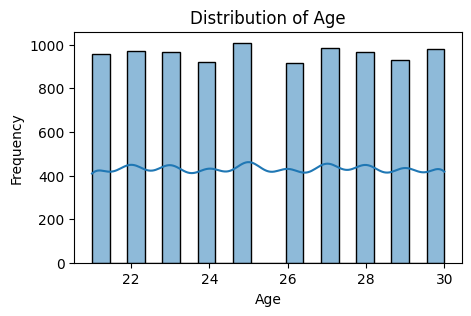

In [12]:
plt.figure(figsize=(5, 3))
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

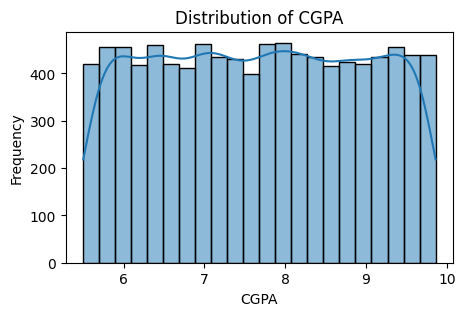

In [13]:
plt.figure(figsize=(5, 3))
sns.histplot(data['CGPA'], kde=True)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

<Axes: >

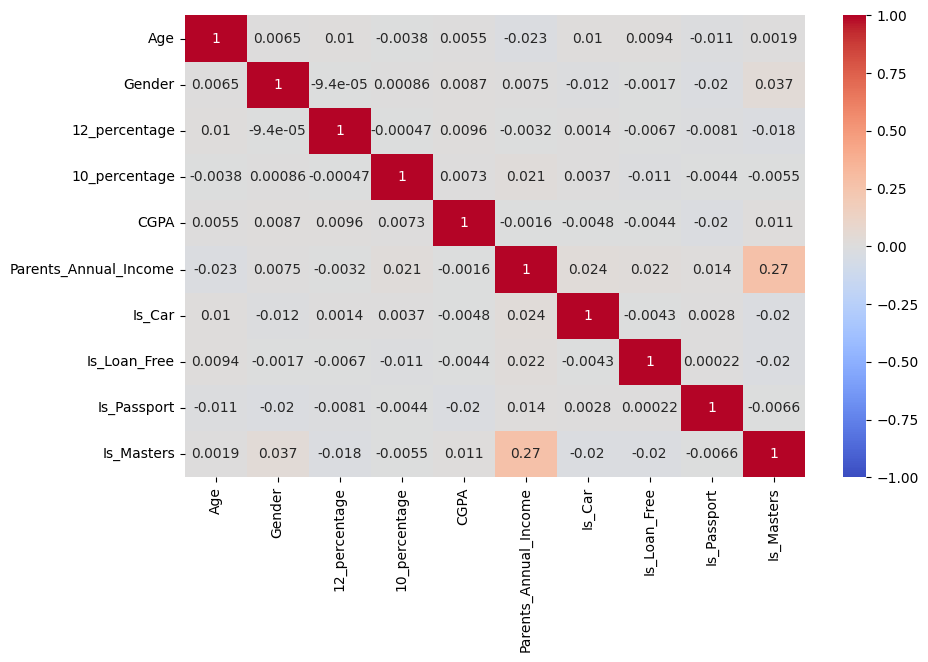

In [14]:
plt.figure(figsize=(10,6))
data_numeric = data.drop(columns=['Name'])
corr_matrix = data_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

Text(0, 0.5, 'Is_Masters')

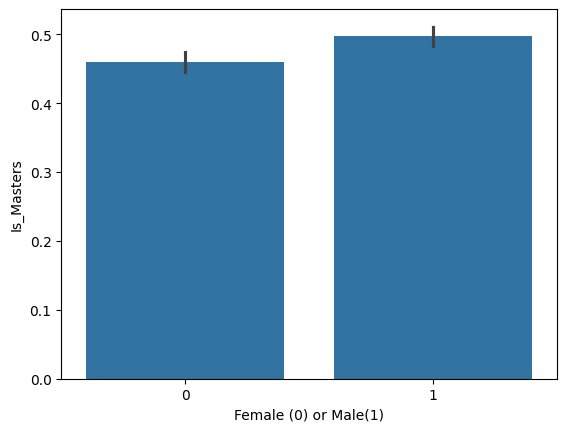

In [15]:
sns.barplot(x='Gender', y='Is_Masters', data=data)
plt.xlabel("Female (0) or Male(1)")
plt.ylabel("Is_Masters")

Text(0, 0.5, 'Is_Masters')

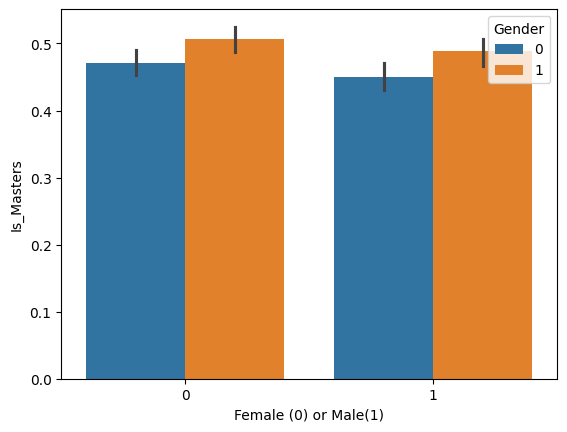

In [16]:
sns.barplot(x='Is_Car',hue='Gender', y='Is_Masters', data=data)
plt.xlabel("Female (0) or Male(1)")
plt.ylabel("Is_Masters")

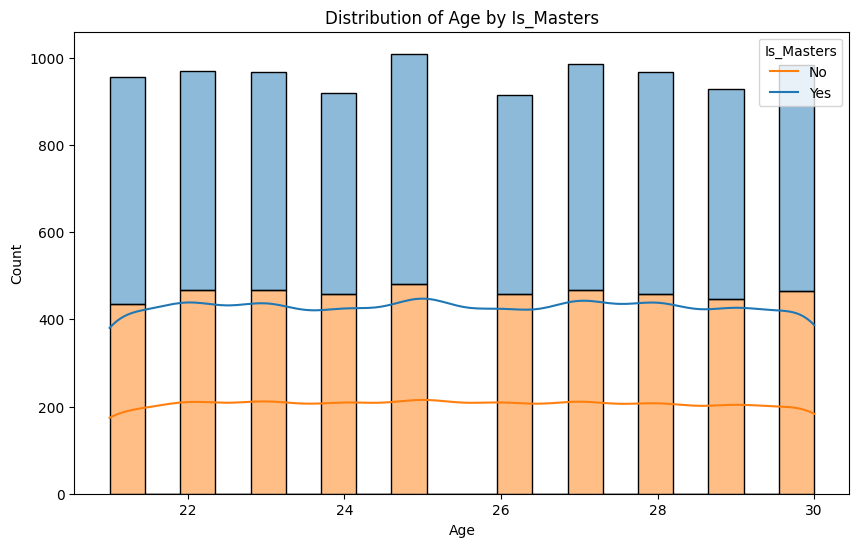

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Is_Masters', multiple='stack', kde=True)
plt.title('Distribution of Age by Is_Masters')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Is_Masters', loc='upper right', labels=['No', 'Yes'])
plt.show()

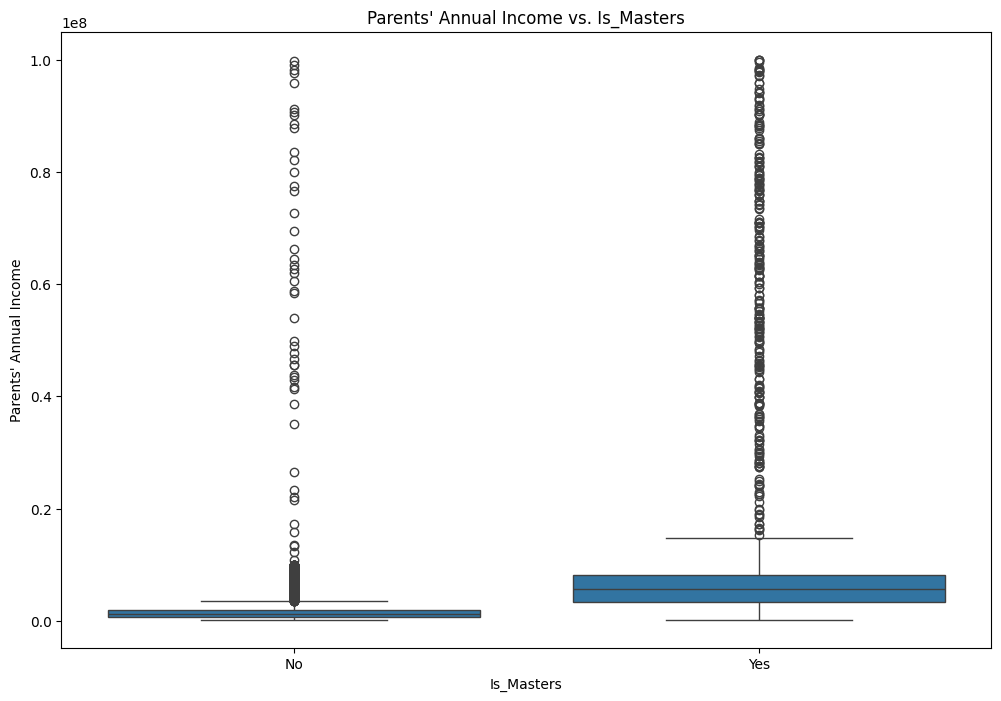

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Is_Masters', y='Parents_Annual_Income')
plt.title("Parents' Annual Income vs. Is_Masters")
plt.xlabel('Is_Masters')
plt.ylabel("Parents' Annual Income")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [19]:
data["Is_Masters"].value_counts()

Is_Masters
0    5000
1    4600
Name: count, dtype: int64

In [20]:
x = data.drop(data.columns[[0,10]], axis = 1)
y = data['Is_Masters']

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state =0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

In [23]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier(max_depth=5,min_samples_split=10, min_samples_leaf=5)
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=20, criterion = 'entropy', random_state = 0 ,max_depth=10)

In [24]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=20,
                       random_state=0)

In [25]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [26]:
logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)

In [27]:
print ("Logistic Regression : ", round(logreg_acc*100, 2))
print ("Support Vector      : ", round(svc_classifier_acc*100, 2))
print ("Decision Tree       : ", round(dt_classifier_acc*100, 2))
print ("K-NN Classifier     : ", round(knn_classifier_acc*100, 2))
print ("Random Forest       : ", round(rf_classifier_acc*100, 2))

Logistic Regression :  76.56
Support Vector      :  78.49
Decision Tree       :  85.0
K-NN Classifier     :  62.66
Random Forest       :  84.95


In [28]:

models = {
    'Logistic Regression': logreg,
    'SVM': svc_classifier,
    'Decision Tree': dt_classifier,
    'KNN': knn_classifier,
    'Random Forest': rf_classifier
}

for name, model in models.items():
    model.fit(xtrain, ytrain)
    train_accuracy = model.score(xtrain, ytrain)
    test_accuracy = model.score(xtest, ytest)
    print(f"{name} - Training Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    if train_accuracy - test_accuracy > 0.10:
        print(f"{name} is likely overfitting.")


Logistic Regression - Training Accuracy: 0.7717, Test Accuracy: 0.7656
SVM - Training Accuracy: 0.8031, Test Accuracy: 0.7849
Decision Tree - Training Accuracy: 0.8501, Test Accuracy: 0.8500
KNN - Training Accuracy: 0.7805, Test Accuracy: 0.6266
KNN is likely overfitting.
Random Forest - Training Accuracy: 0.8671, Test Accuracy: 0.8495
